# Realize Du et al Simplifications

##### imports

In [59]:
import pandas as pd
import json
from matplotlib import pyplot as plt
data = "./data/see_course2060_12-11_to_11-12_logs_filtered.csv"

##### get initial database

In [60]:
all_logs_data = pd.read_csv(data, index_col="id").sort_values("t")
all_logs_data.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164847618,91614,1573584504,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164847708,132616,1573584529,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164847712,91614,1573584531,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847718,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847717,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN


#### define basic functions

In [61]:
# dict = {"name": "name_to_csv", "data": "data_to_write"}
def save_to_csv(list_of_dataframes):
    for dict in list_of_dataframes:
        dict['data'].to_csv(f"{dict['name']}.csv")

#### define simplification functions

##### partion the db in four diferent ones, one for each activitie, and sort this new dbs from the oldest event to the newest

In [62]:
def partitioning():
    first_logs = all_logs_data.sort_values("t").query("t >= 1573527600 & t <= 1574218500").query("assignment_id == 12841 | component != 'core' & component != 'mod_page'")
    second_logs = all_logs_data.sort_values("t").query("t >= 1574132400 & t <= 1574823300").query("assignment_id == 12842 | component != 'core' & component != 'mod_page'")
    third_logs = all_logs_data.sort_values("t").query("t >= 1574737200 & t <= 1575428100").query("assignment_id == 12843 | component != 'core' & component != 'mod_page'")
    fourth_logs = all_logs_data.sort_values("t").query("t >= 1575342000 & t <= 1576032900").query("assignment_id == 12844 | component != 'core' & component != 'mod_page'")

    first_access = all_logs_data.sort_values("t").drop_duplicates(subset=['userid'])
    first_access = first_access.sort_values("userid")

    return [first_access, first_logs, second_logs, third_logs, fourth_logs]

In [63]:
first_access, first_logs, second_logs, third_logs, fourth_logs = partitioning()

In [64]:
first_logs.head()


,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164847712,91614,1573584531,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847718,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847717,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847765,137967,1573584547,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164848057,132616,1573584622,mod_folder,viewed,course_module,1298.0,folder,2060,NaN,N;,r,NaN


In [65]:
first_access.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164924018,239,1573601505,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165048951,275,1573649832,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164972489,438,1573608521,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165062775,739,1573653721,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164878749,1479,1573593097,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN


##### get the length of each db and plot a bar chart showing how many events was for each acitivity

In [66]:
first_logs_size = len(first_logs.index)
second_logs_size = len(second_logs.index)
third_logs_size = len(third_logs.index)
fourth_logs_size = len(fourth_logs.index)
first_access_log_size = len(first_access.index)
total_size = len(all_logs_data.index)

print(first_logs_size + second_logs_size + third_logs_size + fourth_logs_size)

157425


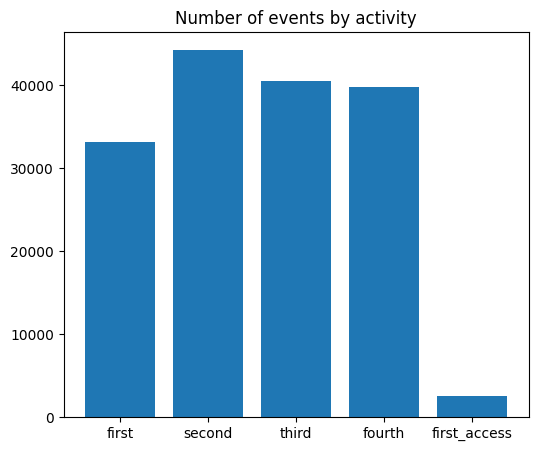

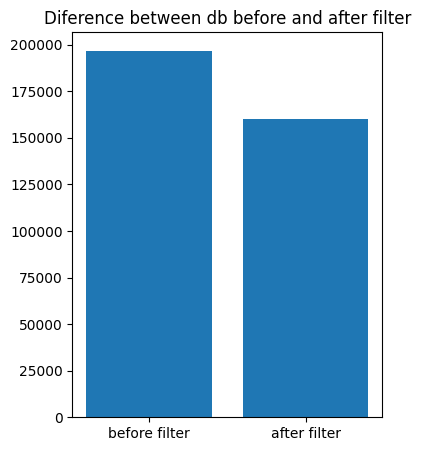

In [67]:
fig = plt.figure(figsize=(6, 5))
sizes = [first_logs_size, second_logs_size, third_logs_size, fourth_logs_size, first_access_log_size]
plt.bar(["first", "second", "third", "fourth", "first_access"], sizes)
plt.title("Number of events by activity")
plt.show()

fig = plt.figure(figsize=(4, 5))
total_logs_size = 0
for i in sizes:
    total_logs_size += i
plt.bar(["before filter", "after filter"], [total_size, total_logs_size])
plt.title("Diference between db before and after filter")
plt.show()

#### organizing & concat first_access and first_logs

In [68]:
first_logs = (pd.concat([first_access, first_logs]))#.sort_values("userid")
first_logs.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164924018,239,1573601505,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165048951,275,1573649832,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164972489,438,1573608521,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165062775,739,1573653721,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164878749,1479,1573593097,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN


## Preparing database to data mining

In [69]:
mapping = pd.read_csv("./data/event_mapping.csv") #, index_col="class")

In [84]:
# return the apropriated class for the identified event
def event_mapping(event, time):
    mapped = mapping[(mapping.component == event[0]) & (mapping.action == event[1]) & (mapping.target == event[2])]
    e = mapped['class'].iloc[0]
    tf = (time - 1573527600) / (1574218500 - 1573527600) * 100
    e = e + "_START" if tf <= 50 else e + "_END"

    return {"event": e, "time": time}


In [83]:
# return a sequence of catalogued events based on a dataframe of events
def generate_sequence_from_df(df):
    e = list(df.apply(lambda x: event_mapping([x.component, x.action, x.target], x.t), axis=1))
    e.pop(0)
    flag = False
    events = []
    for event in reversed(e):
        if (event["event"] == "assignment_sub_START" or event["event"] == "assignment_sub_END") and flag == False:
            flag = True
        if flag:
            events.append(event)
    events = list(reversed(events))

    if events == []:
        return None
        events = e

    for i in range(len(events)):
        try:
            while events[i] == events[i+1]:
                if events[i]["event"] == "assignment_sub_START" or events[i]["event"] == "assignment_sub_END":
                    events.pop(i)
                else:
                    events.pop(i+1)
            if events[i]["event"] == "assignment_vis_START" and events[i+1]["event"] == "assignment_try_START":
                events.pop(i)
            elif events[i]["event"] == "assignment_vis_START" and events[i+1]["event"] == "assignment_sub_START":
                events.pop(i)
            elif events[i]["event"] == "assignment_try_START" and events[i+1]["event"] == "assignment_sub_START":
                events.pop(i)
            elif events[i]["event"] == "assignment_vis_END" and events[i+1]["event"] == "assignment_try_END":
                events.pop(i)
            elif events[i]["event"] == "assignment_vis_END" and events[i+1]["event"] == "assignment_sub_END":
                events.pop(i)
            elif events[i]["event"] == "assignment_try_END" and events[i+1]["event"] == "assignment_sub_END":
                events.pop(i)
        except IndexError:
            pass

    return events
    if len(df.index) < 20000:
        return list(df.apply(lambda x: event_mapping([x.component, x.action, x.target]), axis=1))
    else:
        return list(df.apply(lambda x: event_mapping_large([x.component, x.action, x.target]), axis=1))

In [72]:
# make the database ready for GSP and prefix datamining algoritms
def prepare_database(df, name = "ready.json"):
    events_by_user = []
    total_users = 0
    unique_users = df.drop_duplicates(subset=['userid'])
    unique_users = unique_users['userid'].tolist()

    for userid in unique_users:
        events = generate_sequence_from_df(df[df.userid == userid])
        if events:
            new_user = {"key": str(userid), "events": events}
            events_by_user.append(new_user)
    with open(name, 'w+') as file:
        json.dump([user for user in events_by_user], file)
    return events_by_user

In [85]:
events_by_user = prepare_database(first_logs, 'events_by_user.json')

assignment_vis_END
assignment_sub_END
assignment_try_END
assignment_vis_END
resource_vis_START
assignment_vis_START
resource_vis_START
assignment_vis_END
assignment_sub_END
assignment_vis_END
resource_vis_END
assignment_try_END
assignment_vis_END
resource_vis_START
assignment_vis_END
assignment_vis_START
assignment_sub_START
assignment_vis_START
assignment_try_START
assignment_vis_START
assignment_try_START
assignment_vis_START
resource_vis_START
assignment_vis_START
assignment_vis_END
assignment_sub_END
assignment_try_END
assignment_vis_END
assignment_vis_END
assignment_sub_END
assignment_vis_END
resource_vis_END
assignment_try_END
assignment_vis_END
resource_vis_END
assignment_vis_END
assignment_vis_END
assignment_vis_START
assignment_vis_START
assignment_vis_START
assignment_vis_START
assignment_sub_START
assignment_try_START
assignment_vis_START
resource_vis_START
assignment_vis_START
assignment_sub_END
assignment_vis_END
forum_vis_END
forum_participation_END
forum_vis_END
forum_vi

In [74]:
# all_events = prepare_database(all_logs_data, 'all_events.json')

In [75]:
events_by_user[0:3]

[]

In [76]:
#all_events[0:3]

In [77]:
save_to_csv([{"name": "extracted/extracted_data", "data": first_logs}])
save_to_csv([
    {"name": "extracted/first_activity", "data": first_logs},
    {"name": "extracted/second_activity", "data": second_logs},
    {"name": "extracted/third_activity", "data": third_logs},
    {"name": "extracted/fourth_activity", "data": fourth_logs},
    {"name": "extracted/first_access", "data": first_access}
])